In [1]:
import sys
sys.path.append("../")
import numpy as np
import phate
import graphtools as gt
import pygsp
from src.mds import embed_MDS
import scprep
from scipy.spatial.distance import jensenshannon
from src.embedding import EmbJSD, EmbHeatGeo, EmbHeatPHATE, EmbCTD, EmbGraphMMD
import scanpy as sc
import pandas as pd

In [4]:
adata = pd.read_csv("../data/pusztai.csv", index_col=0)

In [5]:
adata.head()

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2,cell_type_label,cell_type,time,time_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Time_0,0,0,0hr
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Time_0,0,0,0hr
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Time_0,0,0,0hr
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Time_0,0,0,0hr
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Time_0,0,0,0hr


In [12]:
adata.cell_type.unique(), adata.cell_type

array([0, 1])

In [27]:
list(adata.columns[:-4])

['MIR1302-2HG',
 'FAM138A',
 'OR4F5',
 'AL627309.1',
 'AL627309.3',
 'AL627309.2',
 'AL627309.5',
 'AL627309.4',
 'AP006222.2',
 'AL732372.1',
 'OR4F29',
 'AC114498.1',
 'OR4F16',
 'AL669831.2',
 'LINC01409',
 'FAM87B',
 'LINC01128',
 'LINC00115',
 'FAM41C',
 'AL645608.6',
 'AL645608.2',
 'AL645608.4',
 'LINC02593',
 'SAMD11',
 'NOC2L',
 'KLHL17',
 'PLEKHN1',
 'PERM1',
 'AL645608.7',
 'HES4',
 'ISG15',
 'AL645608.1',
 'AGRN',
 'AL645608.5',
 'AL645608.8',
 'RNF223',
 'C1orf159',
 'AL390719.3',
 'LINC01342',
 'AL390719.2',
 'TTLL10-AS1',
 'TTLL10',
 'TNFRSF18',
 'TNFRSF4',
 'SDF4',
 'B3GALT6',
 'C1QTNF12',
 'AL162741.1',
 'UBE2J2',
 'LINC01786',
 'SCNN1D',
 'ACAP3',
 'PUSL1',
 'INTS11',
 'AL139287.1',
 'CPTP',
 'TAS1R3',
 'DVL1',
 'MXRA8',
 'AURKAIP1',
 'CCNL2',
 'MRPL20-AS1',
 'MRPL20',
 'AL391244.2',
 'ANKRD65',
 'AL391244.1',
 'TMEM88B',
 'LINC01770',
 'VWA1',
 'ATAD3C',
 'ATAD3B',
 'ATAD3A',
 'TMEM240',
 'SSU72',
 'AL645728.1',
 'FNDC10',
 'AL691432.4',
 'AL691432.2',
 'MIB2',
 'MMP

In [24]:
adata.iloc[0,]

cell_type_label    Time_0
cell_type               0
time                    0
time_label            0hr
Name: 0, dtype: object

In [ ]:
anndata = sc.AnnData(X=adata.iloc[:,:-4], obs = adata.iloc[:,-4:], var=list(adata.columns[:-4]))

: 

: 

In [50]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=1000)
adata = adata[:, adata.var.highly_variable]


In [45]:
adata.obs.T

,CAAATCAATTAT_000_neg_array1,ATACAATTGACA_000_neg_array1,CTGTTAATGAGA_000_neg_array1,CTTCACATTATT_000_neg_array1,CATACATTTTTT_000_neg_array1,ATCCAATCTATC_000_neg_array1,AGGGTGTGGAGG_000_neg_array1,TGCAATCTGTTT_000_neg_array1,ATAAACCTAACT_000_neg_array1,CATCAACTGTGG_000_neg_array1,...,AGAATCCGACCT_986_pos_array1,ACACGTCCAGTC_986_pos_array1,TGATCAAGCTGC_986_pos_array1,CCATTACCCCTC_986_pos_array1,GGCGCTCAGAAT_986_pos_array1,GCCAAACAAAAT_986_pos_array1,CACGCCGTAATT_986_pos_array1,TTTCTAACGAGT_986_pos_array1,GCCCCTTGTGAT_986_pos_array1,GTGTTGTGTGTC_986_pos_array1
donor_id,Control_Participant7,Control_Participant7,Control_Participant7,Control_Participant7,Control_Participant7,Control_Participant7,Control_Participant7,Control_Participant7,Control_Participant7,Control_Participant7,...,COVID19_Participant30,COVID19_Participant30,COVID19_Participant30,COVID19_Participant30,COVID19_Participant30,COVID19_Participant30,COVID19_Participant30,COVID19_Participant30,COVID19_Participant30,COVID19_Participant30
Peak_Respiratory_Support_WHO_Score,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
Bloody_Swab,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
Percent_Mitochondrial,34.210526,7.068224,3.179056,2.391569,23.463687,29.336735,7.555556,3.71134,8.126604,17.52809,...,2.047593,19.987624,19.86755,14.751131,10.140845,6.487696,9.269663,2.105263,0.613497,18.421053
SARSCoV2_PCR_Status,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,...,pos,pos,pos,pos,pos,pos,pos,pos,pos,pos
SARSCoV2_PCR_Status_and_WHO_Score,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,...,pos_8,pos_8,pos_8,pos_8,pos_8,pos_8,pos_8,pos_8,pos_8,pos_8
Cohort_Disease_WHO_Score,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,...,COVID19_WHO_6-8,COVID19_WHO_6-8,COVID19_WHO_6-8,COVID19_WHO_6-8,COVID19_WHO_6-8,COVID19_WHO_6-8,COVID19_WHO_6-8,COVID19_WHO_6-8,COVID19_WHO_6-8,COVID19_WHO_6-8
biosample_id,WHO_0_Control_Participant7,WHO_0_Control_Participant7,WHO_0_Control_Participant7,WHO_0_Control_Participant7,WHO_0_Control_Participant7,WHO_0_Control_Participant7,WHO_0_Control_Participant7,WHO_0_Control_Participant7,WHO_0_Control_Participant7,WHO_0_Control_Participant7,...,WHO_8_COVID19_Participant30,WHO_8_COVID19_Participant30,WHO_8_COVID19_Participant30,WHO_8_COVID19_Participant30,WHO_8_COVID19_Participant30,WHO_8_COVID19_Participant30,WHO_8_COVID19_Participant30,WHO_8_COVID19_Participant30,WHO_8_COVID19_Participant30,WHO_8_COVID19_Participant30
SingleCell_SARSCoV2_RNA_Status,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,...,neg,neg,neg,neg,neg,neg,neg,amb,pos,amb
SARSCoV2_Unspliced_TRS_Total_Corrected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
for type in adata.obs.Annotation.unique():
    print(type)

Developing Ciliated Cells
Ciliated Cells
Secretory Cells
Squamous Cells
Goblet Cells
T Cells
Dendritic Cells
Basal Cells
Deuterosomal Cells
Macrophages
B Cells
Ionocytes
Mitotic Basal Cells
Developing Secretory and Goblet Cells
Plasmacytoid DCs
Enteroendocrine Cells
Erythroblasts
Mast Cells


In [52]:
mask = (adata.obs.Annotation.isin(["B Cells"])) & (adata.obs.Cohort_Disease_WHO_Score.isin(["Control_WHO_0"]))

In [53]:
adata[mask].obs.T

,TAGGCGGCGTGC_110_neg_array1,TCTTCCCTACCA_179_neg_array1,TTCATTGTTACT_376_neg_array1,GTTCGACGGCCC_376_neg_array1,TAGAGCAATCGA_376_neg_array1,CCGGTACGCTTA_376_neg_array1,AAGACTGAGTGG_376_neg_array2,TACACGTGGTTC_376_neg_array2,TAACCTGACCTG_376_neg_array2,CTCACATTTAGG_376_neg_array2,ATTCCGGTAACG_376_neg_array2,CTTACACTGCAA_593_neg_array1
donor_id,Control_Participant4,Control_Participant5,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant10,Control_Participant8
Peak_Respiratory_Support_WHO_Score,0,0,0,0,0,0,0,0,0,0,0,0
Bloody_Swab,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Percent_Mitochondrial,12.873134,0.872151,32.198221,5.737357,5.933202,8.815272,45.457262,32.851604,9.429825,11.393324,21.243808,23.076923
SARSCoV2_PCR_Status,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg
SARSCoV2_PCR_Status_and_WHO_Score,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0,neg_0
Cohort_Disease_WHO_Score,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0,Control_WHO_0
biosample_id,WHO_0_Control_Participant4,WHO_0_Control_Participant5,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant10,WHO_0_Control_Participant8
SingleCell_SARSCoV2_RNA_Status,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg,neg
SARSCoV2_Unspliced_TRS_Total_Corrected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
mask = (adata.obs.Cohort_Disease_WHO_Score.isin(["Control_WHO_0"]))
adata_covid = adata[mask]

In [55]:
data = adata_covid.X
labels = adata_covid.obs["Annotation"]

In [56]:
knn=50
anisotropy=1
decay=40

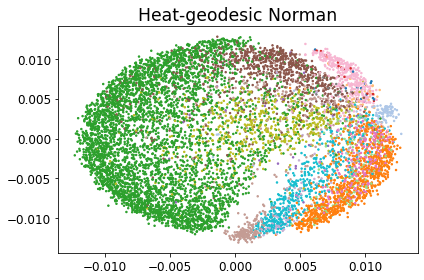

In [57]:
emb_op = EmbHeatGeo(knn=knn)
emb_op.scatterplot(data,labels,title="Heat-geodesic Covid/nasal",tau=0.005)

In [58]:
data.shape

(8689, 1000)

In [59]:
phate_op = phate.PHATE()
emb =  phate_op.fit_transform(data)

Calculating PHATE...
  Running PHATE on 8689 observations and 1000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 29.33 seconds.
    Calculating affinities...
    Calculated affinities in 3.24 seconds.
  Calculated graph and diffusion operator in 33.50 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.12 seconds.
    Calculating KMeans...
    Calculated KMeans in 13.03 seconds.
  Calculated landmark operator in 17.68 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 6.68 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.36 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.82 seconds.
Calculated PHATE in 66.05 seconds.


<AxesSubplot:>

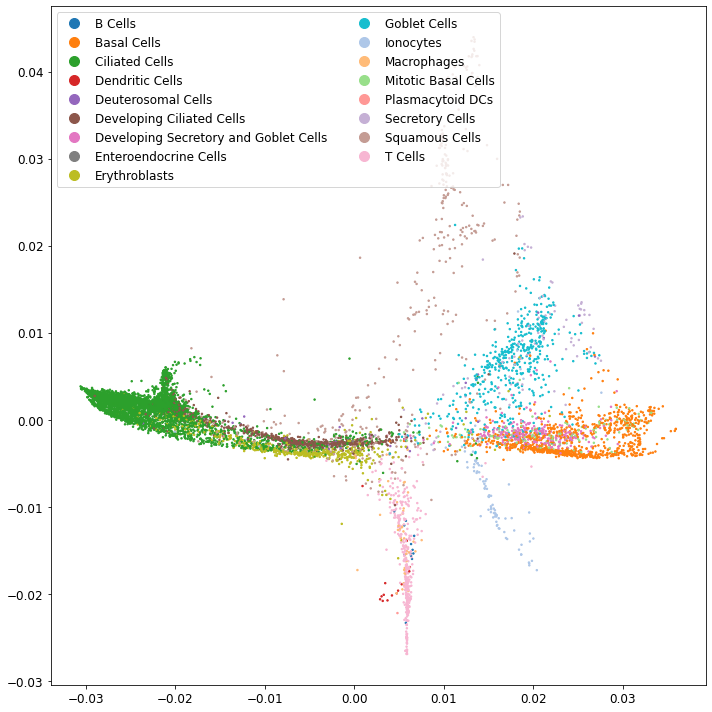

In [63]:
scprep.plot.scatter2d(emb,labels, figsize=(10,10))